Created new feature which is number of individuals in the household from the individual dataset. 

Looking at the distributions, it seems like it can be predictive.

Also, there are not a lot of unique values for number of individuals. Expected because number of people in families have a min and a practical max.

Explore making it a categorical, and also explore binning num of individuals

Also there may be some outliers. For example in B. Theres one example of a family of 21

In [14]:
import sys
sys.path.append("/Users/Bing/Documents/DS/DrivenData/Pover-T/Scripts/") # need to add path to the parent folder where CV.py is

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from PoverTCV import *
from PoverTHelperTools import *
from NewFeatFuncs import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import precision_recall_curve


import xgboost as xgb

In [31]:
hhold_a_train, hhold_b_train, hhold_c_train = load_hhold_train()
hhold_a_test, hhold_b_test, hhold_c_test = load_hhold_test()

indiv_a_train, indiv_b_train, indiv_c_train = load_indiv_train()
# need to load indiv test sets here to make the new feats for the test set for submission
indiv_a_test, indiv_b_test, indiv_c_test = load_indiv_test()

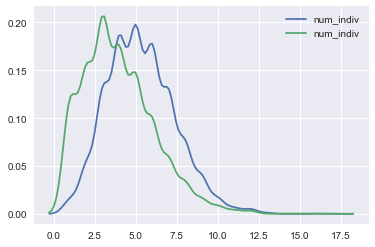

In [40]:
X_train = num_indiv(hhold_a_train, indiv_a_train)
# X_train = standardize(X_train)
# X_train['num_indiv'] = np.log(X_train['num_indiv'])
sns.kdeplot(X_train[X_train['poor'] == 1]['num_indiv'])
sns.kdeplot(X_train[X_train['poor'] == 0]['num_indiv'])

In [41]:
print(X_train['num_indiv'].nunique())
print(X_train['num_indiv'].unique())

17
[ 6  3  5  2  4  7  1  8 10  9 14 12 11 17 13 15 16]


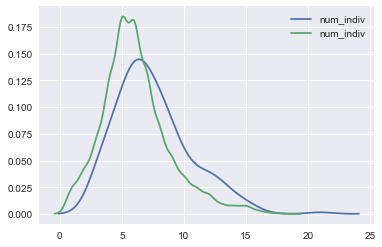

In [43]:
X_train = num_indiv(hhold_b_train, indiv_b_train)
# X_train = standardize(X_train)
# X_train['num_indiv'] = np.log(X_train['num_indiv'])
sns.kdeplot(X_train[X_train['poor'] == 1]['num_indiv'])
sns.kdeplot(X_train[X_train['poor'] == 0]['num_indiv'])

In [44]:
print(X_train['num_indiv'].nunique())
print(X_train['num_indiv'].unique())

19
[ 6  5  8 16  1  2  9  7  3  4 12 10 13 11 15 14 17 21 18]


In [51]:
X_train[X_train['num_indiv'] == 15]

,RzaXNcgd,LfWEhutI,jXOqJdNL,wJthinfa,PTLgvdlQ,ZvEApWrk,euTESpHe,bDVMMSYY,aSzMhjgD,ZehDbxxy,...,AZVtosGB,toZzckhe,BkiXyuSp,ggucvVUs,VMvwrYds,VlNidRNP,rljjAmaN,ChbSWYhO,country,num_indiv
id,,,,,,,,,,,,,,,,,,,,,
95595,zTghO,pYfmQ,lNhMv,3.107065,iuxWN,0.994337,OMRWa,FDqwJ,rxJJI,IbWRL,...,XrijK,LLuZj,qpzpO,kZRgh,VwGOP,yvOdU,gPPdN,Enull,B,15
96106,zTghO,pYfmQ,lNhMv,3.107065,iuxWN,-0.597222,jpSeC,FDqwJ,rxJJI,IbWRL,...,pdvWY,LLzTd,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B,15
84633,zTghO,pYfmQ,yLRKG,3.107065,iuxWN,0.065928,OLVWN,FDqwJ,rxJJI,IbWRL,...,XrijK,lmjln,qpzpO,kZRgh,VwGOP,yvOdU,SKBnS,Enull,B,15
95633,zTghO,pYfmQ,lNhMv,3.107065,iuxWN,0.397503,OLVWN,FDqwJ,rxJJI,IbWRL,...,SiLcr,LLzTd,ZZzXr,kZRgh,VwGOP,yvOdU,SKBnS,Enull,B,15
33543,zTghO,pYfmQ,lNhMv,3.107065,RQnVj,-0.597222,FzqeU,FDqwJ,rxJJI,IbWRL,...,CRHYU,LLuZj,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B,15
3137,zTghO,pYfmQ,yLRKG,3.107065,iuxWN,-0.265647,OLVWN,FDqwJ,ufugi,IbWRL,...,XAeTz,LLuZj,qpzpO,kZRgh,VwGOP,ZwQQe,EBZee,Enull,B,15
45306,zTghO,pYfmQ,lNhMv,3.107065,RQnVj,-0.597222,OMRWa,FDqwJ,ufugi,IbWRL,...,JGoxG,lmjln,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B,15
11804,zTghO,pYfmQ,lNhMv,3.107065,iuxWN,2.386951,OLVWN,FDqwJ,ufugi,IbWRL,...,SiLcr,LLuZj,qpzpO,kZRgh,VwGOP,WFgZH,EBZee,Enull,B,15
75657,zTghO,pYfmQ,lNhMv,3.107065,iuxWN,1.060652,OLVWN,FDqwJ,rxJJI,IbWRL,...,FEjSW,lmjln,qpzpO,kZRgh,VwGOP,WFgZH,akDoa,Enull,B,15


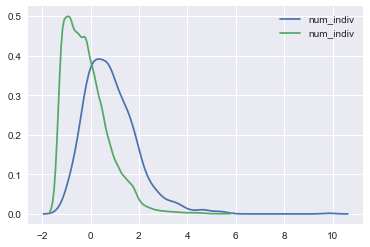

In [37]:
X_train = num_indiv(hhold_c_train, indiv_c_train)
X_train = standardize(X_train)
# X_train['num_indiv'] = np.log(X_train['num_indiv'])
sns.kdeplot(X_train[X_train['poor'] == 1]['num_indiv'])
sns.kdeplot(X_train[X_train['poor'] == 0]['num_indiv'])

In [38]:
X_train['num_indiv'].nunique()

23